_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösungen zu Übung 3: Logik, Verzweigungen und Filter

### Logik

In [1]:
# 1.A
wort = 'Python'

# überprüfe, ob der Buchstabe "e" in dem
# Wort enthalten ist
print('Buchstabe "e" in Wort?')
print('e' in wort)

# gib eine leere Zeile aus
print()

# überprüfe, ob das Wort kürzer als 5 
# Buchstaben ist
print('Wort kürzer als 5 Buchstaben?')
print(len(wort) < 5)

Buchstabe "e" in Wort?
False

Wort kürzer als 5 Buchstaben?
False


In [2]:
# 1.B
zahl = 10

if zahl % 2 == 0:
    print('{} ist gerade'.format(zahl))
else:
    print('{} ist ungerade'.format(zahl))

10 ist gerade


### Verzweigungen

In [3]:
# 2.A
# 3. 
zahlen_liste = list(range(0,21))
print(zahlen_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [4]:
# 2.B
# iteriere über alle Zahlen in zahlen_liste
for zahl in zahlen_liste:
    
    # überprüfe, ob eine Zahl kleiner 10 ist
    if zahl < 10:
        print(zahl * 2)
    
    # Spezialfall für die Zahl 15
    elif zahl == 15:
        print("Achtung: Zahl 15 erreicht!")
    
    # für alle anderen Zahlen gilt zahl >= 10
    # und zahl != 15
    else:
        print(zahl / 2)

0
2
4
6
8
10
12
14
16
18
5.0
5.5
6.0
6.5
7.0
Achtung: Zahl 15 erreicht!
8.0
8.5
9.0
9.5
10.0


### Filter

Wir möchten eine Tabelle erzeugen, die nur die Einträge von überlebenden Passagier\*innen enthält. Wir erinnern uns: bei Überlebenden steht in der Spalte "survived" eine Eins. Wie oben beschrieben, erzeugen wir jetzt eine Maske, um die gestorbenen Passagier*innen wegzufiltern:

In [5]:
# 3.A
# importiere pandas
import pandas as pd

# lade den Datensatz 
titanic_data = pd.read_csv('../data/titanic.csv')

# erzeuge die Maske
maske_lebend = titanic_data['survived'] == 1

# filtere den Datensatz
lebend = titanic_data[maske_lebend]
lebend.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Jetzt möchten wir außerdem noch nach Geschlecht filtern und separate Tabellen für die überlebenden Frauen und Männer erzeugen. Dazu filtern wir die Einträge in der Spalte "sex" nach dem Geschlecht "female" oder "male":

In [6]:
# 3.B überlebende Männer & Frauen

# erzeuge eine Maske für die überlebenden Frauen
# und filtere die Tabelle. Speichere das Ergebnis
# in der Variable "lebend_frau"
maske_lebend_frau = lebend['sex'] == 'female'
lebend_frau = lebend[maske_lebend_frau]

# erzeuge eine Maske für die überlebenden Männer
# und filtere die Tabelle. Speichere das Ergebnis
# in der Variable "lebend_mann"
maske_lebend_mann = lebend['sex'] == 'male'
lebend_mann = lebend[maske_lebend_mann]

# zähle die Anzahl der Überlebenden Frauen
# und Männer mit hilfe der "len()"-Funktion
anzahl_lebend_frau = len(lebend_frau)
anzahl_lebend_mann = len(lebend_mann)

print('Es haben {} Frauen überlebt.'.format(anzahl_lebend_frau))
print('Es haben {} Männer überlebt.'.format(anzahl_lebend_mann))

Es haben 233 Frauen überlebt.
Es haben 109 Männer überlebt.


Jetzt wollen wir noch wissen, wieviele Frauen und Männer unter allen Passagier*innen (also auch den gestorbenen) waren, um uns ein Bild davon zu machen, wieviele Männer und Frauen jeweils überlebt haben:

In [7]:
# 3.C ursprüngliche Passagier*innen der Titanic
# nach Geschlecht

# wir erzeugen wieder zwei Masken für die
# beiden Geschlechter
maske_frau = titanic_data['sex'] == 'female'
maske_mann = titanic_data['sex'] == 'male'

# die nach Frauen und Männern gefilterten
# Tabellen erhalten wir durch Anwenden der Maske
insg_frau = titanic_data[maske_frau]
insg_mann = titanic_data[maske_mann]

# die Anzahl erhalten wir, indem wir die Zeilen
# in den beiden gefilterten Tabellen zählen
anzahl_frau = len(insg_frau)
anzahl_mann = len(insg_mann)

print('Auf der Titanic waren {} Frauen und {} Männer'\
     .format(anzahl_frau, anzahl_mann))

print('Davon haben {} Frauen und {} Männer überlebt'\
     .format(anzahl_lebend_frau, anzahl_lebend_mann))

Auf der Titanic waren 314 Frauen und 577 Männer
Davon haben 233 Frauen und 109 Männer überlebt


In [8]:
# 3.D Überlebenschance

# schließlich rechnen wir noch die Prozentanzahl der 
# überlebenden Frauen und Männer aus:
prozent_lebend_frau = anzahl_lebend_frau / anzahl_frau * 100
prozent_lebend_mann = anzahl_lebend_mann / anzahl_mann * 100

print('Es haben {:1.1f}% der Frauen und {:1.1f}% der Männer überlebt.'\
     .format(prozent_lebend_frau, prozent_lebend_mann))

Es haben 74.2% der Frauen und 18.9% der Männer überlebt.


3.E) Bei Schiffsunglücken verlassen Frauen und Kinder das sinkende Schiff zuerst. Damit lässt sich erklären, dass deutlich mehr Frauen als Männer den Untergang der Titanic überlebt haben. Alternative Erklärungen die einem einfallen könnten, wenn man dieses Wissen nicht hat wären z.B.:
* Frauen können besser Schwimmen
* Frauen können lauter schreien und wurden deswegen von den zur Rettung heraneilenden Schiffen schneller gefunden
* Frauen sind dicker und überleben deswegen länger im Eiswasser
* ...

In [9]:
# 3.F
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Passagiere in den Klassen 1, 2 und 3

# erstelle die Masken
maske_class1 = titanic_data['pclass'] == 1
maske_class2 = titanic_data['pclass'] == 2
maske_class3 = titanic_data['pclass'] == 3

# filtere die Tabelle
insg_class1 = titanic_data[maske_class1]
insg_class2 = titanic_data[maske_class2]
insg_class3 = titanic_data[maske_class3]

# Anzahl der Passagiere in allen drei Klassen
anzahl_class1 = len(insg_class1)
anzahl_class2 = len(insg_class2)
anzahl_class3 = len(insg_class3)

# Ausgabe Zwischenergebnis
print('**Passagiere**')
print('Klasse 1: {}, Klasse 2: {}, Klasse 3: {}'\
     .format(anzahl_class1, anzahl_class2, anzahl_class3))

# Überlebende
# erzeuge die Maske
maske_lebend = titanic_data['survived'] == 1

# filtere den Datensatz
lebend = titanic_data[maske_lebend]

# Masken für die Überlebende in allen drei Klassen
maske_lebend_class1 = lebend['pclass'] == 1
maske_lebend_class2 = lebend['pclass'] == 2
maske_lebend_class3 = lebend['pclass'] == 3

# filtere die Tabelle der Überlebenden nach Klassen
lebend_class1 = lebend[maske_lebend_class1]
lebend_class2 = lebend[maske_lebend_class2]
lebend_class3 = lebend[maske_lebend_class3]

# rechne die Anzahl der Überlebenden nach Klasse aus
anzahl_lebend_class1 = len(lebend_class1)
anzahl_lebend_class2 = len(lebend_class2)
anzahl_lebend_class3 = len(lebend_class3)

# Ausgabe Zwischenergebnis
print()
print('**Überlebende Passagiere**')
print('Klasse 1: {}, Klasse 2: {}, Klasse 3: {}'\
     .format(anzahl_lebend_class1, \
             anzahl_lebend_class2, \
             anzahl_lebend_class3))

# Berechne, wieviel % je Klasse überlebt haben
prozent_lebend_class1 = anzahl_lebend_class1 / anzahl_class1 * 100
prozent_lebend_class2 = anzahl_lebend_class2 / anzahl_class2 * 100
prozent_lebend_class3 = anzahl_lebend_class3 / anzahl_class3 * 100

# Ausgabe Endergebnis
print()
print('**Überlebenschance je Klasse**')
print('Klasse 1: {:1.2f}, Klasse 2: {:1.2f}, Klasse 3: {:1.2f}'\
     .format(prozent_lebend_class1, \
             prozent_lebend_class2, \
             prozent_lebend_class3))

**Passagiere**
Klasse 1: 216, Klasse 2: 184, Klasse 3: 491

**Überlebende Passagiere**
Klasse 1: 136, Klasse 2: 87, Klasse 3: 119

**Überlebenschance je Klasse**
Klasse 1: 62.96, Klasse 2: 47.28, Klasse 3: 24.24


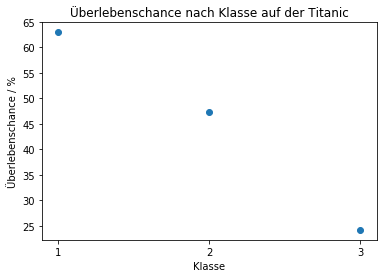

In [11]:
# Bonus: Visualisierung

# importiere matplotlib.pyplot unter dem Kürzel "plt"
# für die Visualisierung
import matplotlib.pyplot as plt
%matplotlib inline

# Die Klassen werden auf der X-Achse dargestellt.
# Dafür erstellen wir eine Liste der Klassen
klassen = [1, 2, 3]

# Die Überlebenschance wird auf der Y-Achse dargestellt,
# Dafür erstellen wir eine Liste der oben ausgerechneten
# Werte
ueberlebenschance = [prozent_lebend_class1, \
                     prozent_lebend_class2, \
                     prozent_lebend_class3]

# Die Funktion "scatter()" erstellt einen "Scatterplot",
# also eine Ansicht der Datenpunkte auf einer Ebene
# aufgespannt von der x-Achse und der y-Achse
# Wir übergeben der Funktion die oben erstellten Listen:
# erst die Liste, die der x-Koordinate (Klassen) entspricht,
# dann die Liste, die der y-Koordinate (Überlebensschance)
# entspricht
plt.scatter(klassen, ueberlebenschance)

# mit der Funktion "title()" geben wir der Abbildung
# eine Überschrift
plt.title('Überlebenschance nach Klasse auf der Titanic')

# mit den Funktionen "xlabel()" und "ylabel()"
# beschriften wir die Achsen der Abbildung. Achsen
# von Abbildungen müssen IMMER beschriftet werden, 
# damit klar, ist, was eigentlich abgebildet wird
plt.xlabel('Klasse')
plt.ylabel('Überlebenschance / %')

# mit dieser Zeile wird noch die Einteilung der
# x-Achse angepasst, damit sie mehr Sinn ergibt.
# Versuche einmal, diese Zeile zu entfernen
# (am besten mit "#" auskommentieren) und sieh
# dir an, wie die x-Achse ohne aussieht.
plt.gca().set_xticks([1,2,3]);